In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import the requests library
import requests

#Import the API key
from config import weather_api_key

### Create Latitude and Longitude Combinations

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

612

## 6.2.6 Get the City Weather Data

In [6]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
#Import the datetime module from the datetime library
from datetime import datetime

In [8]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop Through the List of Cities and Build the City URL

In [9]:
#Loop through all the cities in the list
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1

#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ballina
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | changping
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | sumenep
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | huangmei
Processing Record 15 of Set 1 | sibolga
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 18 of Set 1 | waycross
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | road town
Processing Record 23 of Set 1 | khirkiya
Proce

Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | sioux lookout
Processing Record 43 of Set 4 | nara
Processing Record 44 of Set 4 | wundanyi
Processing Record 45 of Set 4 | konosha
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | angren
Processing Record 48 of Set 4 | alice springs
Processing Record 49 of Set 4 | chekmagush
Processing Record 50 of Set 4 | sarany
Processing Record 1 of Set 5 | san cristobal
Processing Record 2 of Set 5 | vanavara
Processing Record 3 of Set 5 | tautira
Processing Record 4 of Set 5 | alotau
City not found. Skipping...
Processing Record 5 of Set 5 | puerto escondido
Processing Record 6 of Set 5 | ensley
Processing Record 7 of Set 5 | semnan
Processing Record 8 of Set 5 | jinchang
Processing Record 9 of Set 5 | dingle
Processing Record 10 of Set 5 | vuktyl
Processing Record 11 of Set 5 | ternate
Processing Record 12 of Set 5 | pandan
Proce

Processing Record 30 of Set 8 | kondinskoye
Processing Record 31 of Set 8 | thio
Processing Record 32 of Set 8 | chanthaburi
Processing Record 33 of Set 8 | tocopilla
Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | rio grande
Processing Record 36 of Set 8 | kidal
Processing Record 37 of Set 8 | tezu
Processing Record 38 of Set 8 | bengkulu
Processing Record 39 of Set 8 | lithgow
Processing Record 40 of Set 8 | riviere-au-renard
Processing Record 41 of Set 8 | saeby
Processing Record 42 of Set 8 | rungata
City not found. Skipping...
Processing Record 43 of Set 8 | sechura
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | oriximina
Processing Record 46 of Set 8 | maragogi
Processing Record 47 of Set 8 | coihaique
Processing Record 48 of Set 8 | jacksonville
Processing Record 49 of Set 8 | dukat
Processing Record 50 of Set 8 | broken hill
Processing Record 1 of Set 9 | samusu
City not found. Skipping...
Processing Record 2 of Set 9

Processing Record 22 of Set 12 | charleville-mezieres
Processing Record 23 of Set 12 | anchorage
Processing Record 24 of Set 12 | san jeronimo
Processing Record 25 of Set 12 | navrongo
Processing Record 26 of Set 12 | belaya gora
Processing Record 27 of Set 12 | baykit
Processing Record 28 of Set 12 | tiksi
Processing Record 29 of Set 12 | sawtell
Processing Record 30 of Set 12 | itarema
Processing Record 31 of Set 12 | yarkovo
Processing Record 32 of Set 12 | adre
Processing Record 33 of Set 12 | toftir
City not found. Skipping...
Processing Record 34 of Set 12 | kalabo
Processing Record 35 of Set 12 | dumas
Processing Record 36 of Set 12 | kizukuri
Processing Record 37 of Set 12 | a
City not found. Skipping...
Processing Record 38 of Set 12 | tilichiki
Processing Record 39 of Set 12 | lianzhou
Processing Record 40 of Set 12 | barstow
Processing Record 41 of Set 12 | lavrentiya
Processing Record 42 of Set 12 | ahuimanu
Processing Record 43 of Set 12 | yei
Processing Record 44 of Set 1

## 6.2.7 Create a DataFrame of City Weather Data

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ballina,-28.8667,153.5667,80.60,65,75,16.11,AU,2021-02-08 02:26:06
1,Tuktoyaktuk,69.4541,-133.0374,-29.20,75,40,9.22,CA,2021-02-08 02:26:07
2,Port Alfred,-33.5906,26.8910,63.00,94,95,4.00,ZA,2021-02-08 02:26:07
3,Esperance,-33.8667,121.9000,82.40,51,0,24.16,AU,2021-02-08 02:21:49
4,Changping,40.2186,116.2197,37.99,44,0,2.24,CN,2021-02-08 02:26:07
5,Victoria,22.2855,114.1577,71.01,80,17,1.99,HK,2021-02-08 02:22:53
6,Sumenep,-7.0167,113.8667,81.75,79,100,12.95,ID,2021-02-08 02:25:57
7,Ribeira Grande,38.5167,-28.7000,58.96,80,24,17.20,PT,2021-02-08 02:26:08
8,Chuy,-33.6971,-53.4616,64.87,82,16,6.15,UY,2021-02-08 02:26:08
9,Bluff,-46.6000,168.3333,64.18,62,100,8.77,NZ,2021-02-08 02:26:08


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ballina,AU,2021-02-08 02:26:06,-28.8667,153.5667,80.60,65,75,16.11
1,Tuktoyaktuk,CA,2021-02-08 02:26:07,69.4541,-133.0374,-29.20,75,40,9.22
2,Port Alfred,ZA,2021-02-08 02:26:07,-33.5906,26.8910,63.00,94,95,4.00
3,Esperance,AU,2021-02-08 02:21:49,-33.8667,121.9000,82.40,51,0,24.16
4,Changping,CN,2021-02-08 02:26:07,40.2186,116.2197,37.99,44,0,2.24
5,Victoria,HK,2021-02-08 02:22:53,22.2855,114.1577,71.01,80,17,1.99
6,Sumenep,ID,2021-02-08 02:25:57,-7.0167,113.8667,81.75,79,100,12.95
7,Ribeira Grande,PT,2021-02-08 02:26:08,38.5167,-28.7000,58.96,80,24,17.20
8,Chuy,UY,2021-02-08 02:26:08,-33.6971,-53.4616,64.87,82,16,6.15
9,Bluff,NZ,2021-02-08 02:26:08,-46.6000,168.3333,64.18,62,100,8.77


In [12]:
#Create the output file (CSV)
output_data_file = "Weather_Data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Plot Latitude vs. Temperature
### Get Data for Plotting

In [13]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

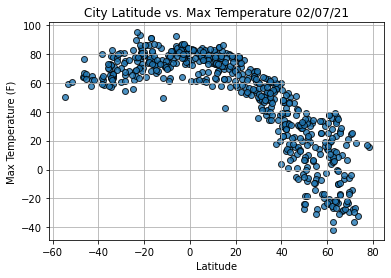

In [14]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig1.png")

#Show plot
plt.show()

## 6.3.2 Plot Latitude vs. Humidity

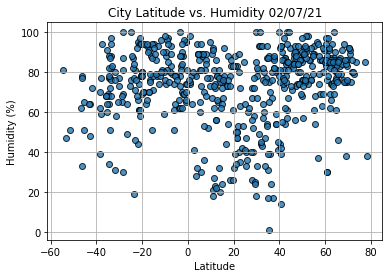

In [15]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig2.png")

#Show plot
plt.show()

## 6.3.3 Plot Latitude vs. Cloudiness

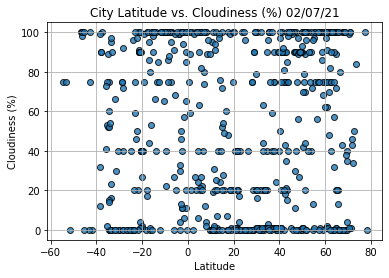

In [16]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig3.png")

#Show plot
plt.show()

## 6.3.4 Plot Latitude vs. Wind Speed

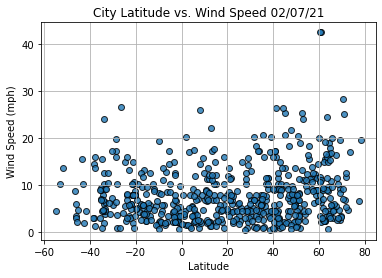

In [17]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig4.png")

# Show plot
plt.show()

## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature
### Create a Linear Regression Function

In [18]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Create the Hemisphere DataFrames

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Sibolga
Country                        ID
Date          2021-02-08 02:26:08
Lat                        1.7427
Lng                       98.7792
Max Temp                     82.6
Humidity                       64
Cloudiness                    100
Wind Speed                   1.63
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
563     True
564     True
565     True
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tuktoyaktuk,CA,2021-02-08 02:26:07,69.4541,-133.0374,-29.20,75,40,9.22
4,Changping,CN,2021-02-08 02:26:07,40.2186,116.2197,37.99,44,0,2.24
5,Victoria,HK,2021-02-08 02:22:53,22.2855,114.1577,71.01,80,17,1.99
7,Ribeira Grande,PT,2021-02-08 02:26:08,38.5167,-28.7000,58.96,80,24,17.20
12,Huangmei,CN,2021-02-08 02:26:08,30.1924,116.0250,48.69,78,100,13.11


In [22]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

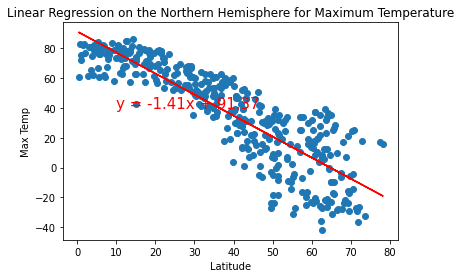

In [23]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

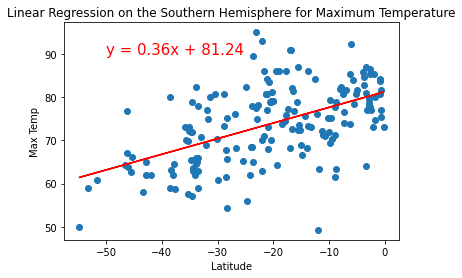

In [24]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

## 6.4.3 Find the Correlation Between Latitude and Percent Humidity
### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

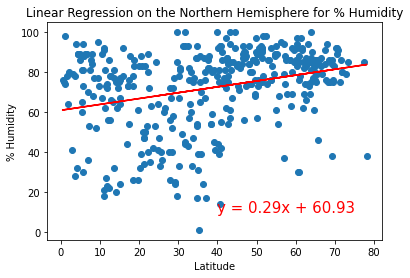

In [25]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

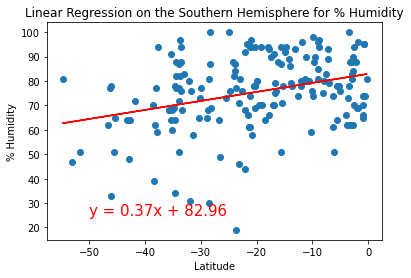

In [26]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,25))

## 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness
#### Skill Drill

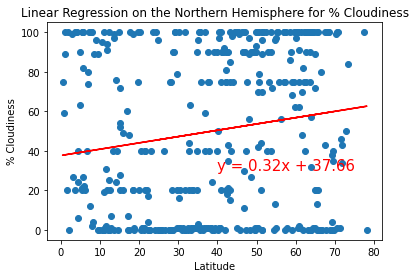

In [27]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,30))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

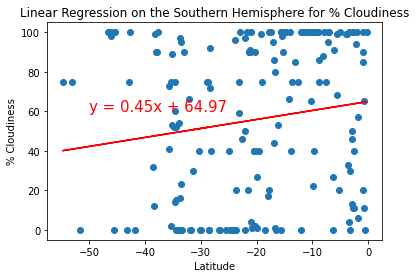

In [28]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

## 6.4.5 Find the Correlation Between Latitude and Wind Speed
### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

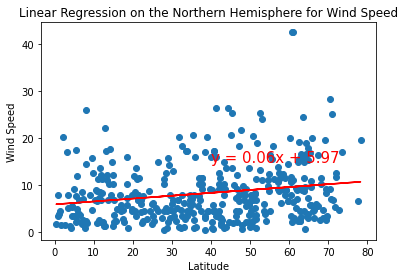

In [29]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,15))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

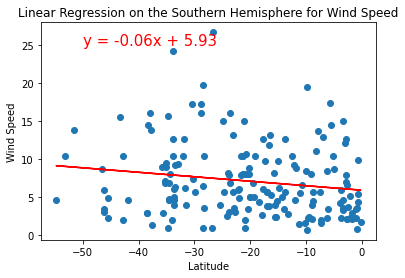

In [30]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))